# Визуальный анализ данных

Для того чтобы выбрать подходящую модель предсказания, нужно представлять себе форму данных. Простое просматривание статистических показателей среднего, отклонения, медианы и так далее не может рассказать всего. Хочется посмотреть на графики.

Когда работа готова, то всегда требуется показать на графиках некоторые результаты.

Именно поэтому важно уметь строить графики по данным и анализировать по ним саму выборку и придумывать гипотезы.

![](https://matplotlib.org/_static/logo2.svg)

![](https://media.giphy.com/media/xT4Ap5ELYhIvIyYKfC/giphy.gif)

В Python основной библиотекой для рисваония графиков является [Matplotlib](https://matplotlib.org/). Другие библиотеки с очень большой вероятностью внутри основываются на ней.

![](https://i.imgur.com/0IsVEaI.png)

Еще одна библиотека для рисования графиков [seaborn](http://seaborn.pydata.org/index.html). В ней есть отличная интеграция с pandas. Многие типичные графики там уже реализованы, поэтому не придется их рисовать с нуля на низкоуровневом matplotlib.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Чтобы графики выводились в jupyter надо выполнить эту магическую команду
%matplotlib inline

pd.set_option('display.max_columns',150)  # выводим максимум 150 колонок ( по умолчанию там около 10)

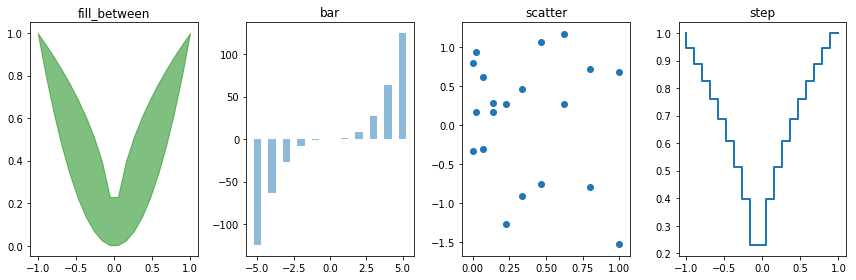

In [7]:
x = np.linspace(-1.0, 1.0, 20)

fig, axes = plt.subplots(1, 4, figsize = (12, 4))

axes[0].fill_between(x, np.sqrt(np.abs(x)), x**2, 
                     color="green", alpha=0.5);
axes[0].set_title("fill_between");

axes[1].bar(np.arange(-5, 6), np.arange(-5, 6)**3, 
            align="center", width=0.5, alpha=0.5)
axes[1].set_title("bar")

axes[2].scatter(x**2, x + 0.5 * np.random.randn(len(x)))
axes[2].set_title("scatter")

axes[3].step(x, np.sqrt(np.abs(x)), lw=2)
axes[3].set_title("step")

fig.tight_layout()

Рассмотрим [данные](https://www.kaggle.com/miroslavsabo/young-people-survey) одного опроса молодых людей 2013 года. В нём молодёж опрашивали по следующим группам вопросов:
- Музыкальные предпочтения (19)
- Предпочтения в фильмах (12)
- Хобби и интересы (32)
- Фобии (10)
- Привычки связанные со здоровьем (3)
- Персональные точки зрения на жизнь (57)
- Денежные траты (7)
- Демографические данные (10)

In [8]:
df = pd.read_csv('../../data/young-people-survey.csv.gz', compression='gzip')
print(df.shape)
df.head(2)

(1010, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


In [11]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

# Distplot - Распределение

Первое, что стоит анализировать, когда вы получаете новый датасет - это посомтреть распределения интересующих вас признаков. Как мы помними с прошлых теориетических занятий мы с вами ищем нормальные распределения.

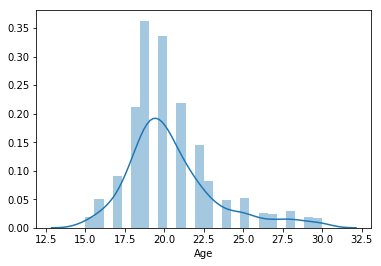

In [105]:
sns.distplot(df['Age'].dropna())

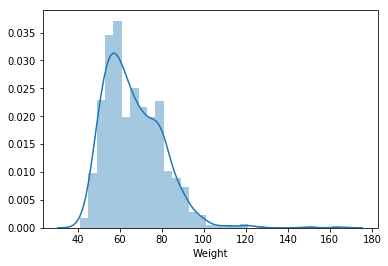

In [107]:
sns.distplot(df['Weight'].dropna())

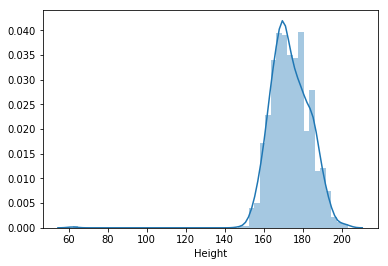

In [103]:
sns.distplot(df['Height'].dropna())

# Countplot - количество

Если у нас есть некоторый категориальный признак, мы можем посмотреть на количественное соотношение по нему.

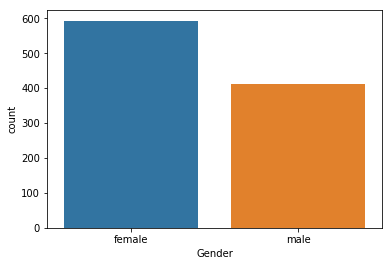

In [117]:
sns.countplot(x='Gender', data=df)

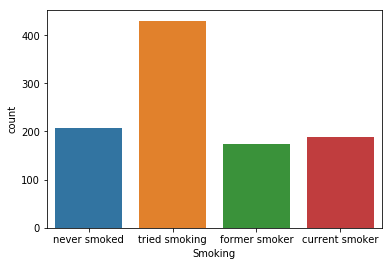

In [143]:
sns.countplot(x='Smoking', data=df)

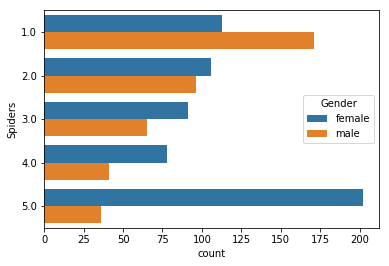

In [124]:
# Кто боится пауков больше? Женщины или мужчины?

sns.countplot(y='Spiders', data=df, hue='Gender')

# Линейная взаимосвязь

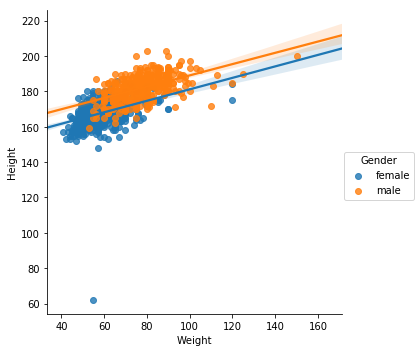

In [137]:
sns.lmplot(x='Weight', y='Height', hue='Gender', data=df)

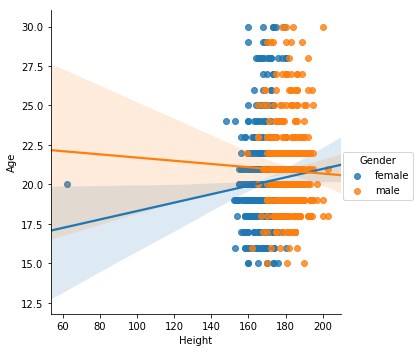

In [131]:
sns.lmplot(x='Height', y='Age', hue='Gender', data=df)

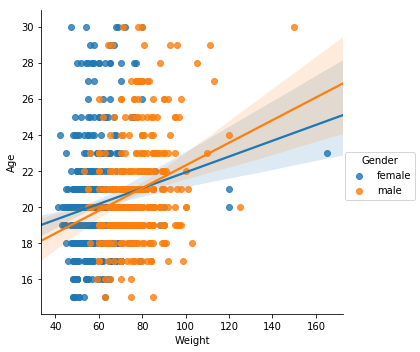

In [133]:
sns.lmplot(x='Weight', y='Age', hue='Gender', data=df)

# Корреляции

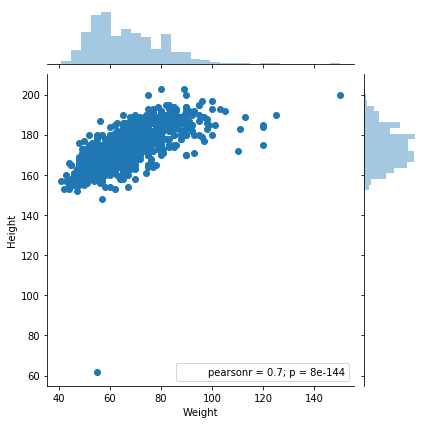

In [138]:
sns.jointplot(x='Weight', y='Height', data=df)

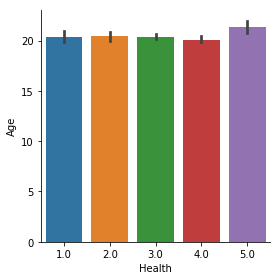

In [180]:
# В среднем более старшие люди следят за здоровьем сильнее, чем младшие.

sns.factorplot(x='Health', y='Age', data=df, kind='bar')

# Boxplot

Ящик с усами или диаграмма размаха - компактное отображение распределения вероятности.
Показывает медиану, нижний и верхний квантили, минимальное и максимальное значение выборки и выбросы.

![](https://habrastorage.org/files/d0f/f53/8d5/d0ff538d59154901b18a98469de07fde.png)

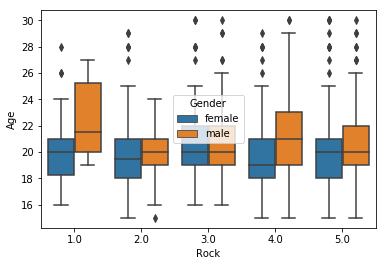

In [184]:
sns.boxplot(x='Rock', y='Age', hue='Gender', data=df)

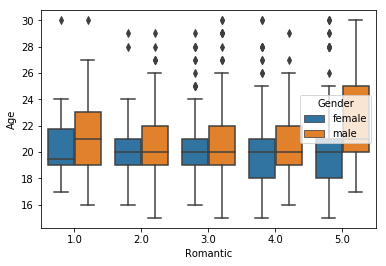

In [188]:
sns.boxplot(x='Romantic', y='Age', hue='Gender', data=df)

# Violinplot

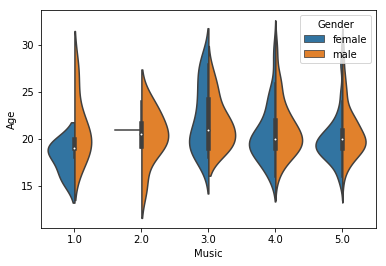

In [207]:
sns.violinplot(x='Music', y='Age', hue='Gender', data=df, split=True)

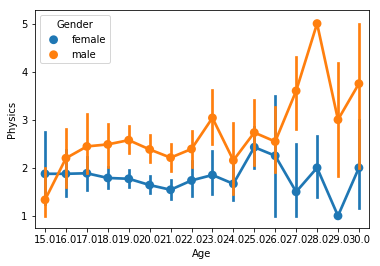

In [216]:
sns.pointplot(x='Age', y='Physics', hue='Gender', data=df)

In [10]:
music = df.iloc[:, 2:19]
music.head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0


In [90]:
# сколько пропусков в музыкальных предпочтениях

music.isnull().sum()

Dance                4
Folk                 5
Country              5
Classical music      7
Musical              2
Pop                  3
Rock                 6
Metal or Hardrock    3
Punk                 8
Hiphop, Rap          4
Reggae, Ska          7
Swing, Jazz          6
Rock n roll          7
Alternative          7
Latino               8
Techno, Trance       7
Opera                1
dtype: int64

In [92]:
music.dropna(inplace=True)

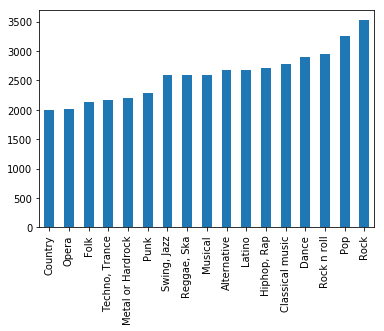

In [93]:
# Что любят больше всего?
music.sum().sort_values().plot(kind='bar')

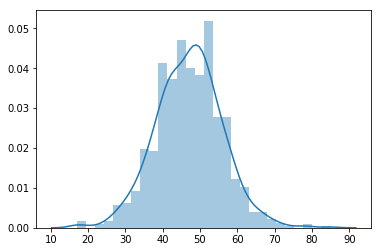

In [95]:
# распределение любви музыки.
# Классическое нормальное распределение. То есть в среднем люди любят 9 жанров из 17

sns.distplot(music.sum(axis=1))

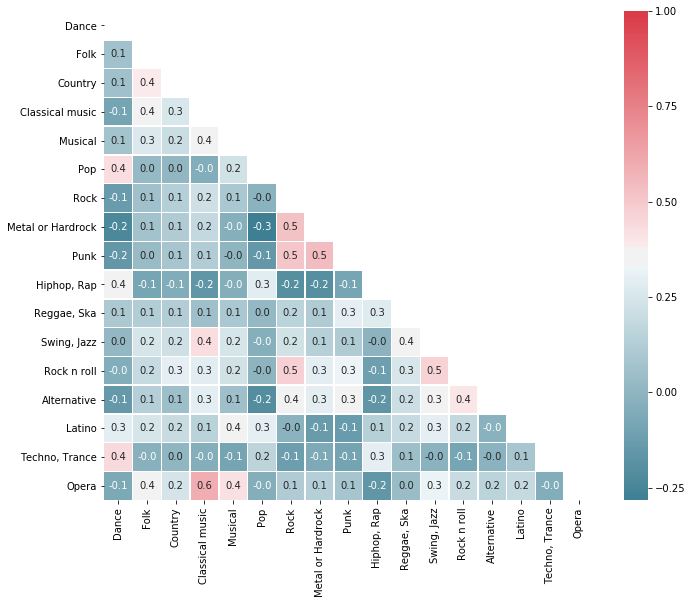

In [12]:
# Существует ли корреляция между предпочтениями в музыке?
corr = music.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, square=True,linewidths=.5, mask=mask,annot=True, fmt=".1f")